## Unión de Tablas de Datos Meteorológicos

Tienes el excel EstaciónMeteo.xlsx con datos horarios de una estación meteorológica que contienen información sobre temperatura, humedad y presión atmosférica. Las tres tablas tienen las mismas columnas, excepto la segunda tabla, que no contiene datos de presión atmosférica. Une las tres tablas verticalmente.

In [1]:
import pandas as pd

Cargamos los datos del Excel [Documentación Pandas read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

In [2]:
archivo = "/content/sample_data/EstaciónMeteo.xlsx"
lunes = pd.read_excel(archivo, sheet_name='Lunes')
martes = pd.read_excel(archivo, sheet_name='Martes')
miercoles = pd.read_excel(archivo, sheet_name='Miércoles')

In [4]:
martes.head()

,Hora,Temperatura (°C),Humedad (%)
0,00:00,7.5,70
1,01:00,7.0,72
2,02:00,6.5,74
3,03:00,6.2,76
4,04:00,6.0,78


<Axes: >

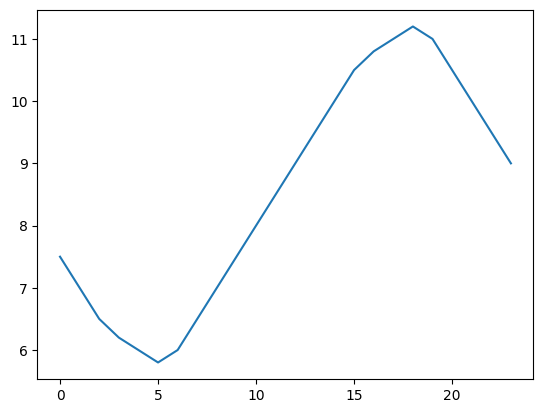

In [7]:
martes["Temperatura (°C)"].plot()

Concatenamos las tablas del excel.

In [11]:
datos_excel = pd.concat([lunes, martes, miercoles], keys=[1,2,3]).reset_index()

In [13]:
datos_excel.drop("level_1", axis=1, inplace=True)

In [15]:
datos_excel.rename(columns={"level_0": "Día"}, inplace=True)

In [16]:
datos_excel

,Día,Hora,Temperatura (°C),Humedad (%),Presión (hPa)
0,1,00:00,10.5,65,1013.2
1,1,01:00,9.8,68,1012.8
2,1,02:00,9.2,70,1012.5
3,1,03:00,8.7,72,1012.3
4,1,04:00,8.3,74,1012.1
...,...,...,...,...,...
67,3,19:00,2.5,93,1010.2
68,3,20:00,2.0,95,1010.0
69,3,21:00,1.5,97,1009.8
70,3,22:00,1.0,99,1009.6


In [21]:
datos_excel.dtypes

,0
Día,int64
Hora,object
Temperatura (°C),float64
Humedad (%),int64
Presión (hPa),float64


In [24]:
datos_excel['Hora'] = datos_excel['Hora'] + ":00"

In [25]:
datos_excel

,Día,Hora,Temperatura (°C),Humedad (%),Presión (hPa)
0,1,00:00:00,10.5,65,1013.2
1,1,01:00:00,9.8,68,1012.8
2,1,02:00:00,9.2,70,1012.5
3,1,03:00:00,8.7,72,1012.3
4,1,04:00:00,8.3,74,1012.1
...,...,...,...,...,...
67,3,19:00:00,2.5,93,1010.2
68,3,20:00:00,2.0,95,1010.0
69,3,21:00:00,1.5,97,1009.8
70,3,22:00:00,1.0,99,1009.6


Posteriormente aparece un csv llamado Vientos.csv de datos de velocidad y dirección del viento pero, en este caso, los datos son cada 15 minutos. Busca una estrategia para unir los datos horizontalmente.

In [17]:
vientos = pd.read_csv("/content/sample_data/Vientos.csv")

In [29]:
vientos["Hora"].str.slice(0,5)

,Hora
0,00:00
1,00:15
2,00:30
3,00:45
4,01:00
...,...
283,22:45
284,23:00
285,23:15
286,23:30


In [36]:
datos_completos = pd.merge(datos_excel, vientos, how="outer", left_on=["Día", "Hora"], right_on=["Día", "Hora"])

In [39]:
datos_completos["Temperatura (°C)"].interpolate(method="linear", inplace=True)

In [40]:
datos_completos

,Día,Hora,Temperatura (°C),Humedad (%),Presión (hPa),Velocidad del viento,Dirección del viento
0,1,00:00:00,10.500,65.0,1013.2,0,234
1,1,00:15:00,10.325,NaN,NaN,0,234
2,1,00:30:00,10.150,NaN,NaN,0,234
3,1,00:45:00,9.975,NaN,NaN,0,234
4,1,01:00:00,9.800,68.0,1012.8,0,234
...,...,...,...,...,...,...,...
283,3,22:45:00,0.625,NaN,NaN,"0,4",286
284,3,23:00:00,0.500,100.0,1009.4,"0,2",254
285,3,23:15:00,0.500,NaN,NaN,0,232
286,3,23:30:00,0.500,NaN,NaN,0,232


In [41]:
datos_completos.to_csv("/content/sample_data/datos_completos.csv")